In [1]:
#importing the libraries
import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
from operator import add

In [2]:
#load model
model = model_from_json(open("model_files/fer.json", "r").read())
#load weights
model.load_weights('model_files/fer.h5')
#load the face detection haar cascade
face_haar_cascade = cv2.CascadeClassifier('model_files/haarcascade_frontalface_default.xml')

In [3]:
cap=cv2.VideoCapture(0) #0 implies live capture

count = 0  # initializing values for graph
final_predictions=np.array([0,0,0,0,0,0,0])

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)
        count+=1
        final_predictions = np.add(final_predictions,predictions[0])

        #find max indexed array
        max_index = np.argmax(predictions[0])
        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)
    
    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break    
        
cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>

In [4]:
print(final_predictions)
print("No of frames captured : ", count)

[1.60056622e+00 6.34136214e-03 3.29230710e+01 1.85403450e+01
 1.39412830e+01 5.06962802e-01 1.11481431e+02]
No of frames captured :  179


In [5]:
final_predictions/=count
print(final_predictions)

[8.94171074e-03 3.54266041e-05 1.83927771e-01 1.03577347e-01
 7.78842628e-02 2.83219443e-03 6.22801289e-01]


<BarContainer object of 7 artists>

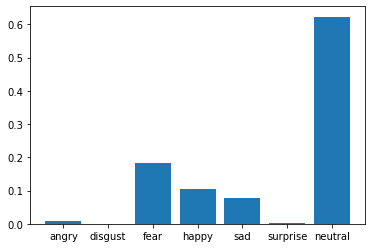

In [6]:
x = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
y = final_predictions
plt.bar(x,y)